# BEE 4750 Homework 3: Dissolved Oxygen and Monte Carlo

**Name**: Priya Shah, Bailey Belinger, Camila Monter

**ID**:

> **Due Date**
>
> Thursday, 10/03/23, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to implement a model for dissolved oxygen in a
    river with multiple waste releases and use this to develop a
    strategy to ensure regulatory compliance.
-   Problem 2 asks you to use Monte Carlo simulation to assess how well
    your strategy from Problem 1 performs under uncertainty.
-   Problem 3 (5750 only) asks you to identify where a third discharge
    should be placed to maintain regulatory compliance.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [31]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/hw3-last-three-braincells`


In [32]:
using Random
using Plots
using LaTeXStrings
using Distributions
using CSV
using DataFrames

## Problems (Total: 50/60 Points)

### Problem 1 (30 points)

A river which flows at 6 km/d is receiving waste discharges from two
sources which are 15 km apart. The oxygen reaeration rate is 0.55
day<sup>-1</sup>, and the decay rates of CBOD and NBOD are are 0.35 and
0.25 day<sup>-1</sup>, respectively. The river’s saturated dissolved
oxygen concentration is 10m g/L.

If the characteristics of the river inflow and waste discharges are
given in <a href="#tbl-river" class="quarto-xref">Table 1</a>, write a
Julia model to compute the dissolved oxygen concentration from the first
wastewater discharge to an arbitrary distance `d` km downstream. Use
your model to compute the maximum dissolved oxygen concentration up to
50km downstream and how far downriver this maximum occurs.

| Parameter | River Inflow | Waste Stream 1 | Waste Stream 2 |
|:--:|---:|---:|---:|
| Inflow | 100,000 m<sup>3</sup>/d | 10,000 m<sup>3</sup>/d | 15,000 m<sup>3</sup>/d |
| DO Concentration | 7.5 mg/L | 5 mg/L | 5 mg/L |
| CBOD | 5 mg/L | 50 mg/L | 45 mg/L |
| NBOD | 5 mg/L | 35 mg/L | 35 mg/L |

Table 1: River inflow and waste stream characteristics for Problem 1.

**In this problem**:

-   Plot the dissolved oxygen concentration from the first waste stream
    to 50m downriver. What is the minimum value in mg/L?
-   What is the minimum level of treatment (% removal of organic waste)
    for waste stream 1 that will ensure that the dissolved oxygen
    concentration never drops below 4 mg/L, assuming that waste stream 2
    remains untreated? How about if only waste stream 2 is treated?
-   Suppose you are responsible for designing a waste treatment plan for
    discharges into the river, with a regulatory mandate to keep the
    dissolved oxygen concentration above 4 mg/L. Discuss whether you’d
    opt to treat waste stream 2 alone or both waste streams equally.
    What other information might you need to make a conclusion, if any?

**Derivation**:

We will begin our derivation using the mass balance equation:

$\sum Q_{in}{CONC}_{in}=\sum Q_{out}{CONC}_{out}$ 

and the continuity of flow rate equation:

$\sum Q_{in}=\sum Q_{out}$

Using these equations, we will first calculate DO concentration immediately after the mixing of the first waste stream with the river, located at $x=0$ km. The initial concentrations of DO, CBOD, and NBOD, and the flow rate in the river, are denoted as $C_0$, $N_0$, $B_0$, and $Q_0$ respectively. The corresponding concentrations and flow rate of the first waste stream will be denoted with subscript 1, and the values immediately after mixing will be denoted with subscript A.  

$Q_{A} = Q_0 + Q_1$

$C_{A} = \frac{Q_0 C_0 + Q_1 C_1 }{Q_{A}}, N_{A} = \frac{Q_0 N_0 + Q_1 N_1 }{Q_{A}}, B_{A} = \frac{Q_0 B_0 + Q_1 B_1 }{Q_{A}}$ 

Next, we describe how the DO concentration changes downstream between the first waste stream and the second. This is governed by the steady-state solution of the Streeter-Phelps equation.

The Streeter-Phelps equation for dissolved oxygen concentration $C(x)$ at a distance $x$ downstream is given by:

$C(x) = C_s(1 - a_1) + C_0 a_1 - B_0 a_2 - N_0 a_3$

- $C_s$ is the saturated dissolved oxygen concentration of the river.
- $U$ is the river velocity (km/day).
- $k_a$, $k_c$, and $k_n$ are the reaeration rate, CBOD decay rate, and NBOD decay rate (1/day), respectively.
- $a_1$, $a_2$, and $a_3$ are terms that account for the rate at which these processes influence DO levels at distance $x$.

The following exponential terms $a_1$, $a_2$, and $a_3$ are derived from the differential equations of DO, CBOD, and NBOD dynamics, respectively. 

$a_1 = \exp\left(-\frac{k_a x}{U}\right)$

$a_2 = \frac{k_c}{k_a - k_c} \left(\exp\left(-\frac{k_c x}{U}\right) - \exp(-\frac{k_a x}{U})\right)$

$a_3 = \frac{k_n}{k_a - k_n} \left(\exp(-\frac{k_n x}{U}) - \exp(-\frac{k_a x}{U})\right)$
 
The concentrations of CBOD and NBOD at distance $x$ are modeled as exponentially decaying functions:

$B(x) = B_0 \exp\left(-\frac{k_c x}{U}\right)$

$N(x) = N_0 \exp\left(-\frac{k_n x}{U}\right)$


Now that we have calculated the concentrations of DO, CBOD, and NBOD up to $x=15$ km, we have to perform another mass balance to find the concentrations and flow rates at the point immediately after mixing with the second waste stream. These values will be denoted with subscript B. 

$Q_{B} = Q_{A} + Q_2$

$C_{B} = \frac{Q_A C_{15} + Q_2 C_2 }{Q_{B}}, N_{A} = \frac{Q_A N_{15} + Q_2 N_2 }{Q_{B}}, B_{B} = \frac{Q_A B_{15} + Q_2 B_2 }{Q_{B}}$ 

Here, $C_{15}$, $N_{15}$, and $B_{15}$ represent the concentrations of DO, NBOD, and CBOD, respectively, at $x=15$ km, and the concentrations and flow rate of the second waste stream will be denoted with subscript 2. 

Now for distances greater than 15km, we can use the Streeter-Phelps equation again, but this time using the concentrations after mixing at point B as the initial values. 

$C(x) = C_s(1 - a_1) + C_{B} a_1 - B_{B} a_2 - N_{B} a_3$

This process allows us to track how the DO concentration evolves downstream from both waste stream inputs.

3.755999600467006

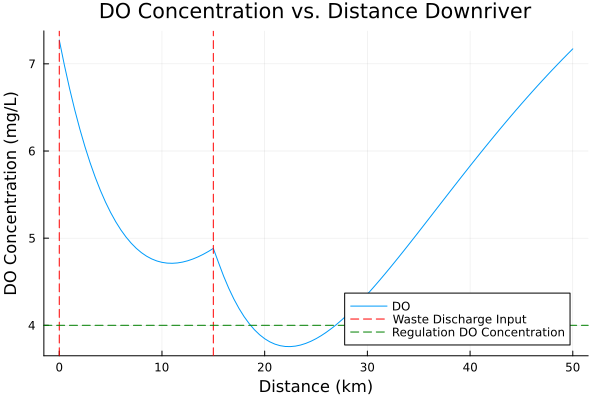

In [33]:
# The function mix calculates the flow rate (Qout), DO concentration 
# (Cout), CBOD concentration (Nout), and NBOD concentration (Bout)
# after a mixing point.
function mix(Q0,C0,N0,B0,Q1,C1,N1,B1)
    Qout=Q0+Q1 
    Cout=((Q0*C0)+(Q1*C1))/Qout
    Nout=((Q0*N0)+(Q1*N1))/Qout
    Bout=((Q0*B0)+(Q1*B1))/Qout
    return(Qout,Cout,Nout,Bout)
end

# The function do_simulate uses the Streeter-Phelps
# equation to determine the concentrations of DO, CBOD, and NBOD.
function do_simulate(x, C0, B0, N0, ka, kn, kc, Cs, U)
    B = B0 * exp(-kc * x / U)
    N = N0 * exp(-kn * x / U)
    a1 = exp(-ka * x / U)
    a2 = (kc/(ka-kc)) * (exp.(-kc * x / U) - exp(-ka * x / U))
    a3 = (kn/(ka-kn)) * (exp(-kn * x / U) - exp(-ka * x / U))
    C = Cs * (1 - a1) + (C0 * a1) - (B0 * a2) - (N0 * a3)
    return (C, B, N)
end  

# The function DO_w_discharge calculates the DO concentration
# given 2 waste inputs 'dist_bet' apart at distance 'd' downstream.
function DO_w_discharge(ka, kc, kn, C0, B0, N0, Q0, C1, B1, N1, 
    Q1, C2, B2, N2, Q2, Cs, U, d, dist_bet)
    # Initialzie vectors
    x_values = collect(0:0.5:d)
    num = 1
    DO_output = zeros(d*2+1)
    # Loop through all distances from 0 to d with an interval of 0.5km.
    for x = 0:0.5:d
        # Initial mixing
        QA,CA,NA,BA = mix(Q0,C0,N0,B0,Q1,C1,N1,B1)
        # Calculates DO concentration before second waste input
        if x <= dist_bet
         C, B, N = do_simulate(x, CA, BA, NA, ka, kn, kc, Cs, U)
         DO_output[num] = C
        else 
        # Calculates DO concentration after second waste input
         C15, B15, N15 = do_simulate(dist_bet, CA, BA, NA, ka, kn, kc, Cs, U)
         QB,CB,NB,BB = mix(QA,C15,N15,B15,Q2,C2,N2,B2)
         C, B, N = do_simulate(x-dist_bet, CB, BB, NB, ka, kn, kc, Cs, U)
         DO_output[num] = C
        end
        num = num + 1
     end
     return(DO_output, x_values)
end

# Intialize variables
ka = 0.55 # oxygen rearation rate (1/d)
kc = 0.35 # CBOD decay rate (1/d)
kn = 0.25 # NBOD decay rate (1/d)

C0 = 7.5 #mg/L
B0 = 5 #mg/L
N0 = 5 #mg/L
Q0 = 100000 #m^3/day

C1= 5 #mg/L
B1 = 50 #mg/L
N1 = 35 #mg/L
Q1 = 10000 #m^3/day

C2= 5 #mg/L
B2 = 45 #mg/L
N2 = 35 #mg/L
Q2 = 15000 #m^3/day

Cs = 10 #mg/L
U = 6 #km/day

dist_bet = 15
d = 50

DO_output, x_values = DO_w_discharge(ka, kc, kn, C0, B0, N0, Q0, C1, B1, N1, Q1, C2, B2, N2, Q2, Cs, U, d, dist_bet)

# Determine minimum of DO concentration
min_DO = minimum(DO_output)
display(min_DO)

plot(x_values, DO_output, xlabel = "Distance (km)", ylabel = "DO Concentration (mg/L)", title = "DO Concentration vs. Distance Downriver", label = "DO")
# Add a vertical lines at waste discharge points
vline!([dist_bet], linestyle=:dash, color=:red, label="Waste Discharge Input") 
vline!([0], linestyle=:dash, color=:red, label= false)
hline!([4], linestyle=:dash, color=:green, label= "Regulation DO Concentration")


**Solution:**

The minimum DO value is 3.756 mg/L.

In [34]:
# Waste stream 1 treated
min_DO1 = min_DO
# Iterate through different % removal of organics until minimum DO concentration reaches 4 mg/L
for p_removal = 0:0.001:1
    B1_new = B1 * (1 - p_removal)
    N1_new = N1 * (1 - p_removal)
    DO_output_1, x_values_1 = DO_w_discharge(ka, kc, kn, C0, B0, 
    N0, Q0, C1, B1_new, N1_new, Q1, C2, B2, N2, Q2, Cs, U, d, dist_bet)
    min_DO1 = minimum(DO_output_1)
    if min_DO1 >= 4
        display(min_DO1)
        display(p_removal*100)
        break # exit the loop once minimum DO exceeds 4 mg/L 
    end  
end

4.000897551323316

15.2

**Solution:**

Assuming that waste stream two remains untreated, the minimum level of treatment for waste stream one that will ensure the DO concentration never drops below 4 mg/L is 15.2%, which results in a new minimum of 4.0009 mg/L.

In [35]:
# Waste stream 2 treated
B1 = 50 #mg/L
N1 = 35 #mg/L
min_DO1 = min_DO
# Iterate through different % removal of organics until minimum DO concentration reaches 4 mg/L
for p_removal = 0:0.001:1
    B2_new = B2 * (1 - p_removal)
    N2_new = N2 * (1 - p_removal)
    DO_output_2, x_values_2 = DO_w_discharge(ka, kc, kn, C0, B0, 
    N0, Q0, C1, B1, N1, Q1, C2, B2_new, N2_new, Q2, Cs, U, d, dist_bet)
    min_DO2 = minimum(DO_output_2)
    if min_DO2 >= 4
        display(min_DO2)
        display(p_removal*100)
        break # exit the loop once minimum DO exceeds 4 mg/L 
    end  
end

4.00077007051385

11.700000000000001

**Solution:**

Assuming that waste stream one remains untreated, the minimum level of treatment for waste stream two that will ensure the DO concentration never drops below 4 mg/L is 11.7%, which results in a new minimum of 4.00077 mg/L.

In [36]:
# Both waste streams treated
B1 = 50 #mg/L
N1 = 35 #mg/L
B2 = 45 #mg/L
N2 = 35 #mg/L
min_DO_both = min_DO
# Iterate through different % removal of organics until minimum DO concentration reaches 4 mg/L
for p_removal = 0:0.001:1
    B1_new = B1 * (1 - p_removal)
    N1_new = N1 * (1 - p_removal)
    B2_new = B2 * (1 - p_removal)
    N2_new = N2 * (1 - p_removal)
    DO_output_both, x_values_both = DO_w_discharge(ka, kc, kn, C0, B0, 
    N0, Q0, C1, B1_new, N1_new, Q1, C2, B2_new, N2_new, Q2, Cs, U, d, dist_bet)
    min_DO_both = minimum(DO_output_both)
    if min_DO_both >= 4
        display(min_DO_both)
        display(p_removal*100)
        break # exit the loop once minimum DO exceeds 4 mg/L 
    end  
end

4.002339592014641

6.6000000000000005

**Solution:**

When treating both waste streams equally, the minimum level of treatment that will ensure the DO concentration never drops below 4 mg/L is 6.60%, which results in a new minimum of 4.00233 mg/L.

Based on the percent removal required for each method, we recommend treating both waste streams equally as it requires the least amount of treatment. 

In order to make a more informed decision, additional information regarding cost would be necessary. **ask if theres anything else**

### Problem 2 (20 points)

The simplest climate model involves capturing changes to the Earth’s
energy budget (it is commonly called the *energy balance model*, or
EBM). These changes are also called *radiative forcings* (RF), and can
result from several causes, including greenhouse gas emissions, volcanic
eruptions, and changes to the solar cycle. The EBM treats the Earth as a
0-dimensional sphere covered with water, which absorbs heat in response
to radiative forcings. Chanwith global temperature changes resulting
from imbalances in the average (over the entire surface area) heat flux.

The EBM equations are:

$$
\begin{align*}
\overbrace{\frac{dH}{dt}}^{\text{change in heat}} &= \overbrace{F}^{\substack{\text{radiative} \\ \text{forcing}}} - \overbrace{\lambda T}^{\substack{\text{change in} \\ \text{temperature}}} \\
\underbrace{C}_{\substack{\text{ocean heat} \\ \text{capacity}}} \frac{dT}{dt} &= F - \lambda T \\
c\underbrace{d}_{\substack{\text{ocean} \\ \text{mixing depth}}} \frac{dT}{dt} &= F - \lambda T,
\end{align*}
$$

where $c = 4.184\times 10^6 \mathrm{J/K/m}^2$ is the specific heat of
water per area, $d$ is the depth of the ocean mixed layer (we’ll assume
$d = 86 \mathrm{m}$), and $\lambda$ is the **climate feedback factor**
and controls how much the Earth warms in response to increased radiative
forcing (assume
$\lambda = 2.1^\circ \mathrm{C}/(\mathrm{W}/\mathrm{m}^2$)). The total
radiative forcing $F = F_\text{non-aerosol} + \alpha F_\text{aerosol}$,
where $\alpha$ is an uncertain scaling factor reflecting aerosol-cloud
feedbacks (we’ll assume $\alpha = 0.8$).

The code below loads historical and projected radiative forcings (under
the SSP5-8.5 future emissions scenario, which is the most extreme of the
scenarios used to project climate change impacts) from
`data/ERF_ssp585_1750-2500.csv` into a `DataFrame` object and calculates
the non-aerosol and aerosol components of those forcings.

> **Tip**
>
> Look closely at and experiment with the code below: `DataFrames` are a
> common Julia datatype for tabular data, and you may work more with
> them later in the semester or beyond! They are broadly similar to
> `DataFrames` from `pandas` in Python.

In [37]:
# Dataset from https://zenodo.org/record/3973015
# The CSV is read into a DataFrame object, and we specify that it is comma delimited
forcings_all = CSV.read("data/ERF_ssp585_1750-2500.csv", DataFrame, delim=",")

# Separate out the individual components
# Get total aerosol forcings
forcing_aerosol_rad = forcings_all[!,"aerosol-radiation_interactions"]
forcing_aerosol_cloud = forcings_all[!,"aerosol-cloud_interactions"]
forcing_aerosol = forcing_aerosol_rad + forcing_aerosol_cloud
# Calculate non-aerosol forcings from the total.
forcing_total = forcings_all[!,"total"]
forcing_non_aerosol = forcing_total - forcing_aerosol

751-element Vector{Float64}:
  0.25918289716993287
  0.24176756635599128
  0.21325975144045076
  0.17850291224529793
  0.1457411149414377
  0.09840432796857469
 -0.13383410588305977
  0.01724897551757567
  0.14777213389926366
  0.22712653379357609
  ⋮
 12.638871538651715
 12.636828023749903
 12.634811388909599
 12.632786007467395
 12.630739504290775
 12.628694395288093
 12.626673788131408
 12.624680005793559
 12.623637075242984

We can plot the aerosol and non-aerosol forcings below.

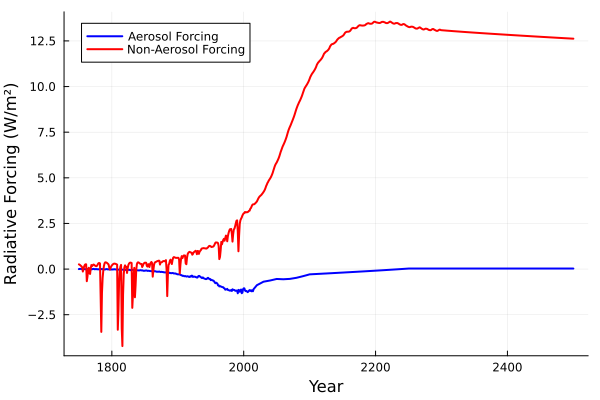

In [38]:
t = Int64.(forcings_all[!,"year"]) # Ensure that years are interpreted as integers
p_forcing = plot(; xlabel="Year", ylabel="Radiative Forcing (W/m²)")
plot!(p_forcing, t, forcing_aerosol, label="Aerosol Forcing", color=:blue, linewidth=2)
plot!(p_forcing, t, forcing_non_aerosol, label="Non-Aerosol Forcing", color=:red, linewidth=2)

**In this problem**:

-   Discretize the EBM to produce a simulation model of global mean
    temperatures $T$ over time as a result of total radiative forcings
    $F$.

-   Simulate global mean temperature anomalies (in $^\circ C$ relative
    to 1750) from your model using the historical and SSP5-8.5 radiative
    forcing data. Use an annual time step for the simulation (in
    seconds: $\Delta t = 31,558,152 \mathrm{s}$). You can assume
    $T(0) = 0^\circ C$. Plot the resulting temperature simulation.

-   The climate feedback factor $\lambda$ is one of the key
    uncertainties in projecting future temperatures, even assuming a
    particular scenario of future radiative forcing. Suppose we use the
    following distribution for $\lambda$,
    $$\lambda \sim \text{LogNormal}(\log(2.1), \log(2)/4).$$

    Use Monte Carlo simulation to estimate the expected temperature in
    2100 assuming SSP5-RCP 8.5 radiative forcings (with 95% confidence
    intervals). How does this estimate compare to the value you got from
    your simulation using the expected value of
    $\lambda=2.1^\circ \mathrm{C}/(\mathrm{W}/\mathrm{m}^2)$? How did
    you decide your sample set was sufficient?

We discretize the EBM with respect to time

$$\frac{dT}{dt}=\frac{T(n+1)-T(n)}{\Delta t} = \frac{F(n) - \lambda T(n)}{C}$$ 

Solving for T(n+1)
$$T(n+1) = T(n) + \frac{\Delta t}{C}(F(n)-\lambda T(n))$$

This can also be rewritten as
$$T(n) = T(n-1) + \frac{\Delta t}{C}(F(n-1)-\lambda T(n-1))$$

4.559848360784454

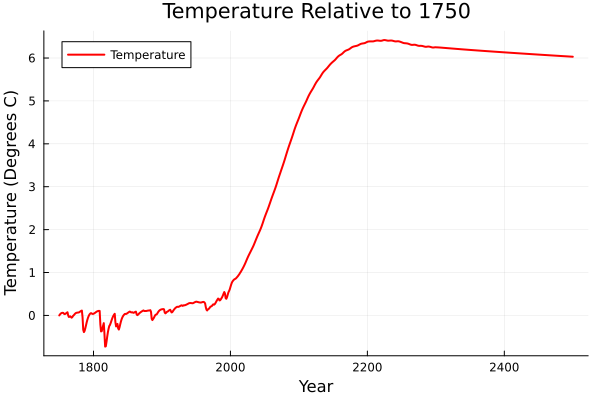

In [39]:
# Givens
lambda = 2.1 #degrees C / (W/m^2)
c = 4.184e6 #Joules/Kelvin*m^2
d = 86 #meters
a = 0.8 # uncertainty scaling factor
C = c * d
delta_t = 31558152 #seconds

# This function simulates global mean temperatures based on the total forcing for each year relative to 1750
function simulate_T(forcing_total, delta_t, lambda, C)
    T_vec = zeros(length(forcing_total))
    for i = 2:length(forcing_total)
        F = forcing_total[i-1]
        T_vec[i] = T_vec[i-1] + (delta_t/C)*(F-lambda*T_vec[i-1])
    end
    return(T_vec)
end

#Calls function
T_vec = simulate_T(forcing_total, delta_t, lambda, C)

# In order to find temperature in the year 2100, we subtract the relative year to find the correct index
Temp2100 = T_vec[2100-1750]
display(Temp2100)

#Plots
plot(t, T_vec, label="Temperature", xlabel = "Year", ylabel = "Temperature (Degrees C)", title = "Temperature Relative to 1750" , color=:red, linewidth=2)

**Solution**

Using our simulation, we determined the global mean temperature in the year 2100, relative to 1750, to be 4.56 degrees C.

In [42]:
# This function uses Monte Carlo to simulate n iterations of calculating
# the mean global temperature at the year 2100 -- relative to the year 1750
function MC_simulate_T(delta_t, C, n, forcing_total)
    T_vec = zeros(length(forcing_total))
    T_2100 = zeros(n)
    # Using the given distribution for the climate feedback factor Lambda,
    # generate the distribution accordingly
    lambda_dist = LogNormal(log(2.1),(log(2)/4))
    st_dev = zeros(length(forcing_total))
    st_dev[1] = 0
    st_dev_2100 = zeros(n)
    # Iterates through n simulations
    for k = 1:n
        lambda_sample = rand(lambda_dist)
        # Calculates temperature and standard deviation relative to 1750
        for i = 2:length(forcing_total)
            F = forcing_total[i-1]
            T_vec[i] = T_vec[i-1] + (delta_t/C)*(F-lambda_sample*T_vec[i-1])
            st_dev[i] = std(T_vec[1:i]) / sqrt(k)
        end
        # In order to find temperature and standard deviation in the year 2100,
        # we subtract the relative year to find the correct index
        T_2100[k] = T_vec[2100-1750]
        st_dev_2100[k] = st_dev[2100-1750]
    end
    return(T_2100,st_dev_2100)
end

n = 1000 
# Calls function    
T_2100, st_dev_2100 = MC_simulate_T(delta_t, C, n, forcing_total)

# Calculates running estimate of temperature in the year 2100 relative to the year 1750
T_run_est = cumsum(T_2100)./(1:n)
n_vec = collect(1:n)

# Expected value
MCTemp2100 = mean(T_2100)

display(MCTemp2100)
display(st_dev_2100)
    
# Plots
plot(n_vec, T_run_est, label="Temperature", xlabel = "Iteration", ylabel = "Temperature (Degrees C)", 
        title = "Temperature Relative to 1750", linewidth=2, ribbon=1.96*st_dev_2100)

hline!([MCTemp2100], color="red", linestyle=:dash, label = "Expected Value")

st_error = st_dev_2100[n] / sqrt(n)
display(st_error)

4.595206517516082

1000-element Vector{Float64}:
 1.1082550299826381
 0.8709708956082062
 0.9705050013184979
 0.6260420891969914
 0.47514365398688974
 0.606877717669836
 0.4727242719770736
 0.38643569826989504
 0.31976927500772623
 0.4693399250287577
 ⋮
 0.03585405741213094
 0.0380262158722029
 0.04021544542163807
 0.03722224779433718
 0.04079381410147064
 0.031861879158621514
 0.05480786516905848
 0.03870444618510051
 0.042473627115090735

0.0013431340217237337

**Solution**

Using Monte Carlo simulation with the Log Normal distribution to simulate Lambda, we estimated the expected temperature in the year 2100 (relative to 1750) to be 4.62 degrees C

This is a 0.99 % difference to our previous estimate, in which we used a fixed value for Lambda of 2.1 degrees C.

After trial and error, we decided on a sample set of 1,000 iterations. This results in a standard error of 0.0013 for the nth iteration. Therefore, we believe this is a sufficient number of iterations because the standard error was low. The size of our sample set also agrees with the Law of Large Numbers which states that the average of the results obtained from a large number of random samples converges to the true value, if it exists. Hence, using 1,000 samples allows for the random sample to converge to it's true value (4.62).

### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

A factory is planning a third wastewater discharge into the river
downstream of the second plant. This discharge would consist of 5
m<sup>3</sup>/day of wastewater with a dissolved oxygen content of 4.5
mg/L and CBOD and NBOD levels of 50 and 45 mg/L, respectively.

**In this problem**:

-   Assume that the treatment plan you identified in Problem 1 is still
    in place for the existing discharges. If the third discharge will
    not be treated, under the original inflow conditions (7.5 mg/L DO),
    how far downstream from the second discharge does this third
    discharge need to be placed to keep the river concentration from
    dropping below 4 mg/L?

## References

List any external references consulted, including classmates.